
## Even though a CNN performs better than an ANN, it struggles to classify rotated images of a rose. To tackle this problem, we use data augmentation.

### We have used flower dataset from google. And download it locally.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras


In [4]:
# Load the dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [6]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [10]:
roses = list(data_dir.glob('roses/*'))
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))
len(roses)

641

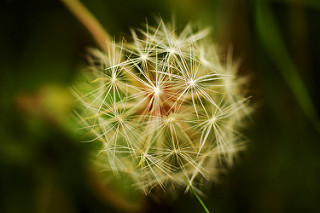

In [11]:
# For visual we have to use PIL library
import PIL
PIL.Image.open(str(dandelion[0]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:6]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
import cv2
img = cv2.imread(str(flowers_images_dict['roses'][83]))

In [17]:
img = cv2.resize(img,(100,100))
img.shape

(100, 100, 3)

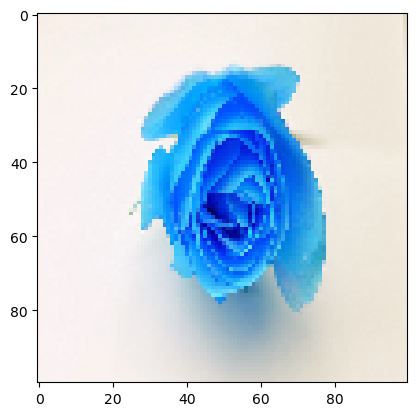

In [18]:
plt.imshow(img)

In [19]:
X,Y = [],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(80,80))
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(Y)

In [21]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [22]:
X_train = X_train.astype('float16')
X_test = X_test.astype('float16')

In [23]:
#Normalisation
X_test_scaled = X_test/255
X_train_scaled = X_train/255

In [24]:
##CNN MODEL
cnn = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='SparseCategoricalCrossentropy',
            metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=8)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4357 - loss: 1.2830
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6054 - loss: 0.9804
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6642 - loss: 0.8366
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7242 - loss: 0.7047
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7976 - loss: 0.5503
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8445 - loss: 0.4078
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8935 - loss: 0.2845
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9368 - loss: 0.1883
Epoch 9/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9535 - loss: 0.1379
Epoch 10/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9640 - loss: 0.1130


In [52]:
cnn.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6710 - loss: 1.7730


[1.7729806900024414, 0.671023964881897]

In [54]:
prediction = cnn.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [78]:
def Flower_name(value):
    for k, v in flowers_labels_dict.items():
        if v==value:
            print(k)

In [102]:
Flower_name(np.argmax(prediction[775]))

sunflowers


In [104]:
Flower_name(y_test[775])

sunflowers


improving test accuracy with data augmentation

In [117]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(80, 80, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


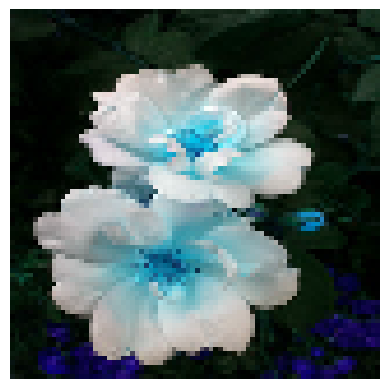

In [125]:
plt.axis('off')
plt.imshow(X[0])

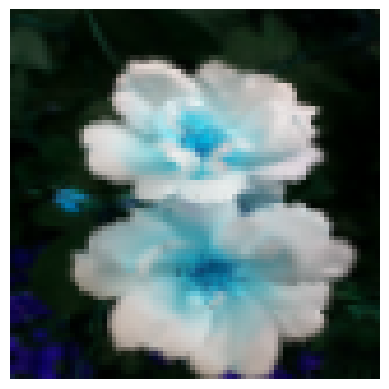

In [131]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [151]:
##CNN MODEL
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    
    layers.Dense(5, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='SparseCategoricalCrossentropy',
            metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=8)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4360 - loss: 1.2986
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5705 - loss: 1.0793
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6199 - loss: 0.9644
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6544 - loss: 0.8952
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6657 - loss: 0.8459
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6908 - loss: 0.7910
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6988 - loss: 0.7848
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7089 - loss: 0.7490
Epoch 9/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7231 - loss: 0.7232
Epoch 10/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7344 - loss: 0.6963


In [152]:
cnn.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7026 - loss: 0.8221


[0.8221325874328613, 0.7026143670082092]

### After using data augmentation we got test accuracy 67.1% from  to 70.2%